## Bank Customer Churn

[Kaggle](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn?resource=download)


In [12]:
# Import necessary library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [13]:
# Read file data

df = pd.read_csv("dataset/Customer-Churn-Records.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [16]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### Data is clean, isn't contain null value, all column are formatted in right type. Just only check DUPLICATE

In [17]:
df.duplicated().any()

False

### DATA is CLEAN

### My Mission in this step : Choose feature columns which affect to why people exit the bank and classify Numeric and Categorical

#### Realize that RowNumber, CustomerId, SurName are infomation of customer, which aren't feature, so DROP them


#### Statistic columns to classify

In [18]:
df.drop(columns= ['RowNumber', 'CustomerId', 'Surname'],inplace = True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [19]:
df.nunique()

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

#### Follow above statistic, can classify columns in dataset


|Numeric|Categoric|
|:-:|:-:|
|CreditScore|Geography|
|Balance|Gender|
|Age|Tenure|
|EstimatedSalary|NumOfProducts|
|Point Earned|HasCrCard|
||IsActiveMember|
||Exited|
||Complain|
||Satisfaction Score|
||Card Type|

#### To Categoric, we use countplot, boxplot, treemap, piechart
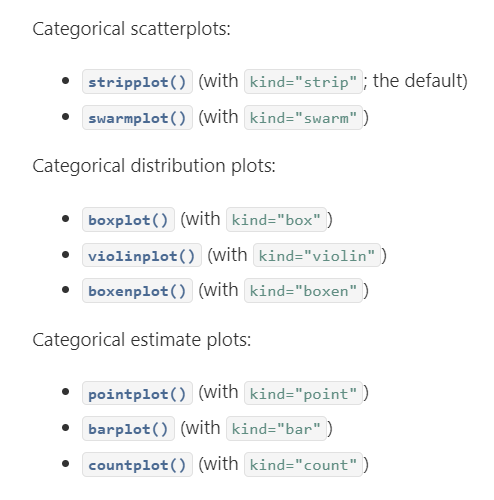

#### To Numeric, we use histograms, box plots, ogive graphs, and scatter plots. 


[7962, 2038]


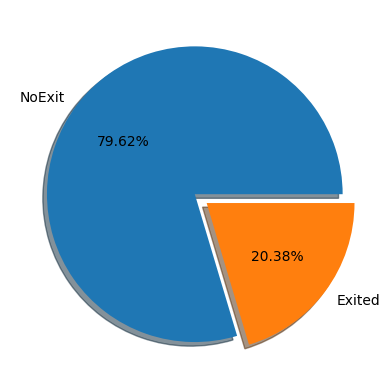

In [20]:
# Check number people EXIT and NOEXIT

sizes_exit = [df.Exited[df['Exited'] == 0].count(),df.Exited[df['Exited'] == 1].count()]
print(sizes_exit)
labels = ['NoExit', "Exited"]
plt.pie(sizes_exit,labels = labels, autopct = "%.2f%%", shadow = True, explode =[0,0.1])
plt.show()

[4543, 5457]


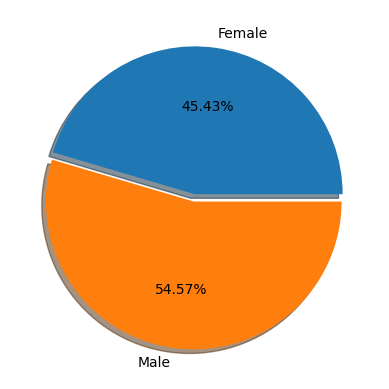

In [21]:
# Check number people Female and male

sizes_gender = [df.Gender[df['Gender'] == "Female"].count(),df.Gender[df['Gender'] == "Male"].count()]
print(sizes_gender)
labels_g = ['Female', "Male"]
plt.pie(sizes_gender,labels = labels_g, autopct = "%.2f%%", shadow = True, explode =[0,0.05])
plt.show()

[5014, 2477, 2509]


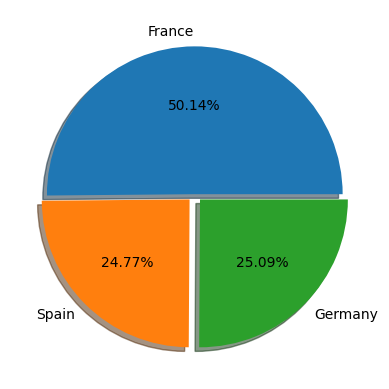

In [22]:
# Check number people by Geography

sizes_geo = [df.Geography[df['Geography'] == "France"].count(),df.Geography[df['Geography'] == "Spain"].count(),df.Geography[df['Geography'] == 'Germany'].count()]
print(sizes_geo)
labels_geo = ['France', "Spain", 'Germany']
plt.pie(sizes_geo,labels = labels_geo, autopct = "%.2f%%", shadow = True, explode =[0,0.05,0.05])
plt.show()

## Distribution of categorical variables


<Axes: xlabel='Card Type', ylabel='count'>

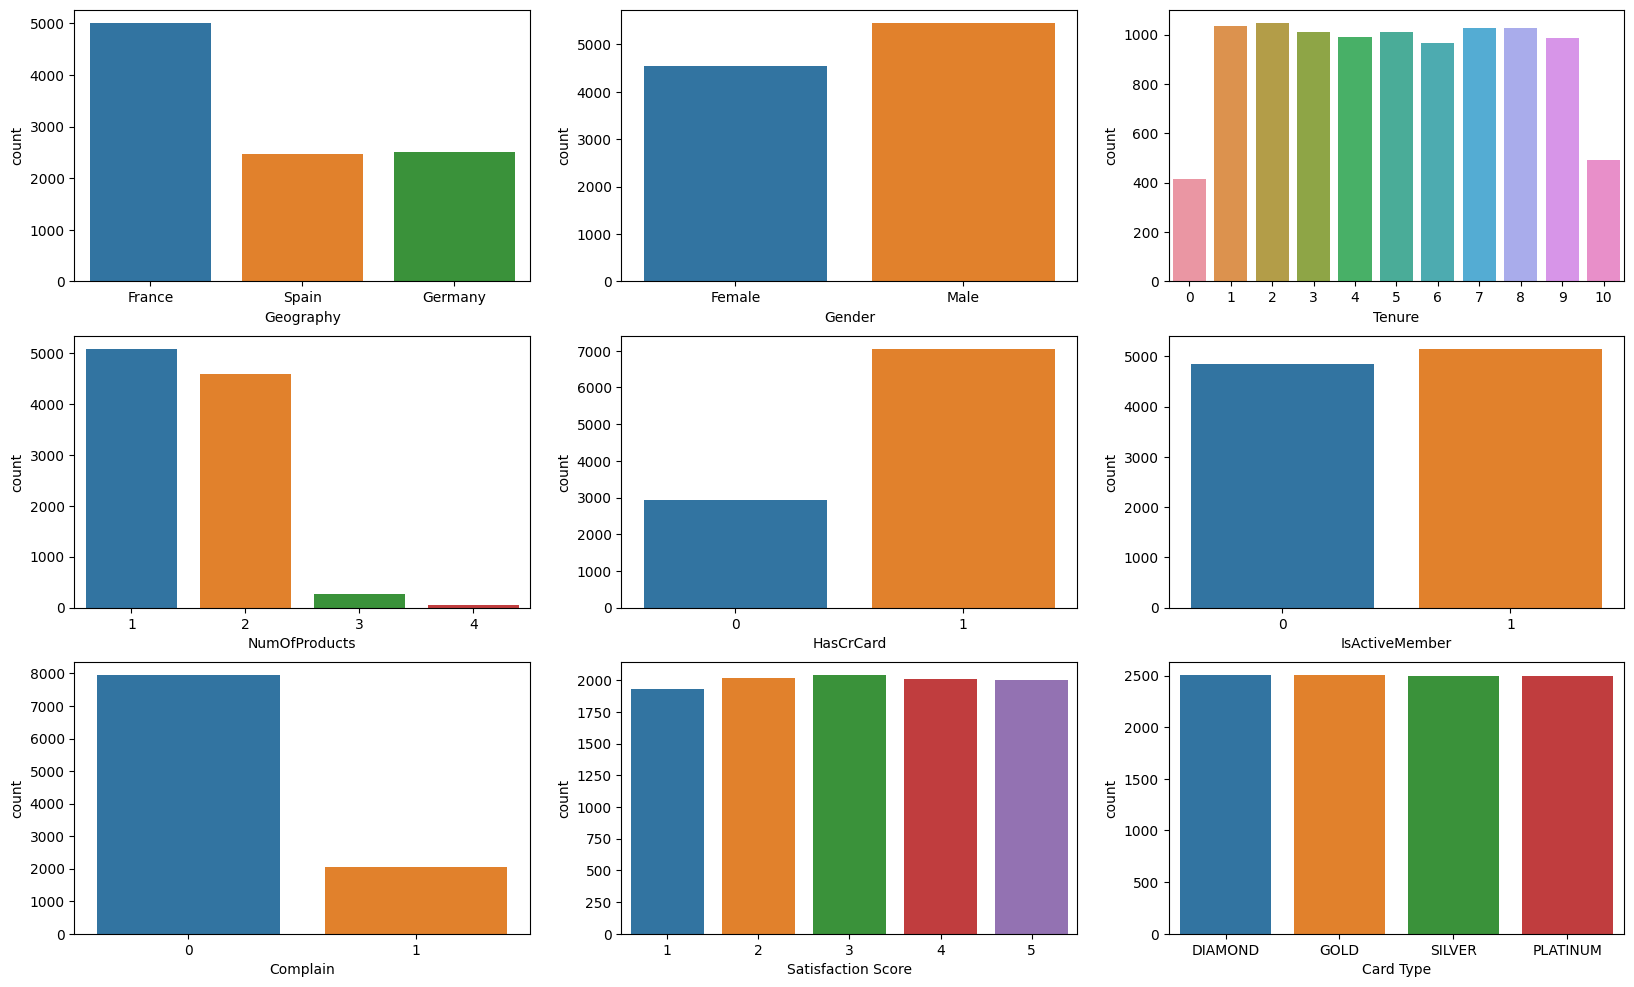

In [23]:
fig, axes = plt.subplots(3,3, figsize =(20,12))
sns.countplot(df, x = "Geography", ax = axes[0,0])
sns.countplot(df, x = "Gender", ax = axes[0,1])
sns.countplot(df, x = "Tenure", ax = axes[0,2])
sns.countplot(df, x = "NumOfProducts", ax = axes[1,0])
sns.countplot(df, x = "HasCrCard", ax = axes[1,1])
sns.countplot(df, x = "IsActiveMember", ax = axes[1,2])
sns.countplot(df, x = "Complain", ax = axes[2,0])
sns.countplot(df, x = "Satisfaction Score", ax = axes[2,1])
sns.countplot(df, x = "Card Type", ax = axes[2,2])

#### Can analyze that

+ France is the most

+ Male > Female

+ NumOfProducts focuses on 1 and 2

+ HasCrCard > HasnotCrCard

+ Complain have a few

-> Columns which can be features : Geography, Gender, NumOfProducts, HasCrCard, IsActiveMember, Complain

## Distribution of numerical variables


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

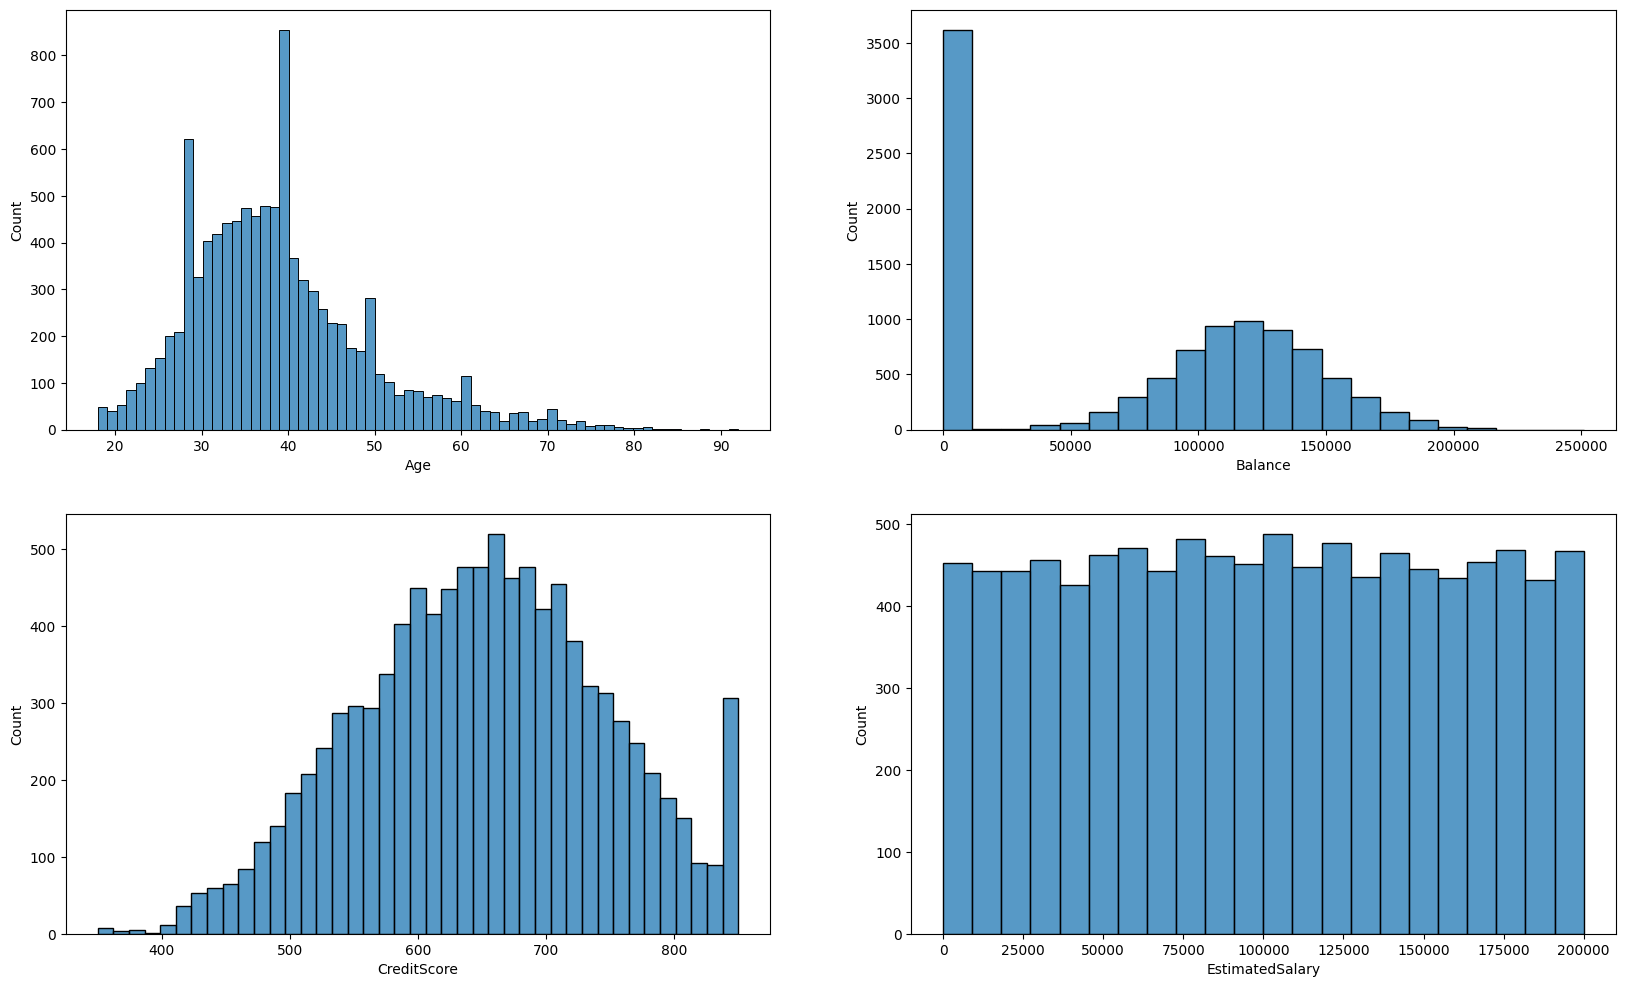

In [24]:
fig, axes = plt.subplots(2,2, figsize = (20,12))

sns.histplot(df, x = 'Age', ax = axes[0][0])
sns.histplot(df, x = 'Balance', ax = axes[0][1])
sns.histplot(df, x = 'CreditScore', ax = axes[1][0])
sns.histplot(df, x = 'EstimatedSalary', ax = axes[1][1])

### Relation Exit and categorical variable

<Axes: xlabel='Exited', ylabel='count'>

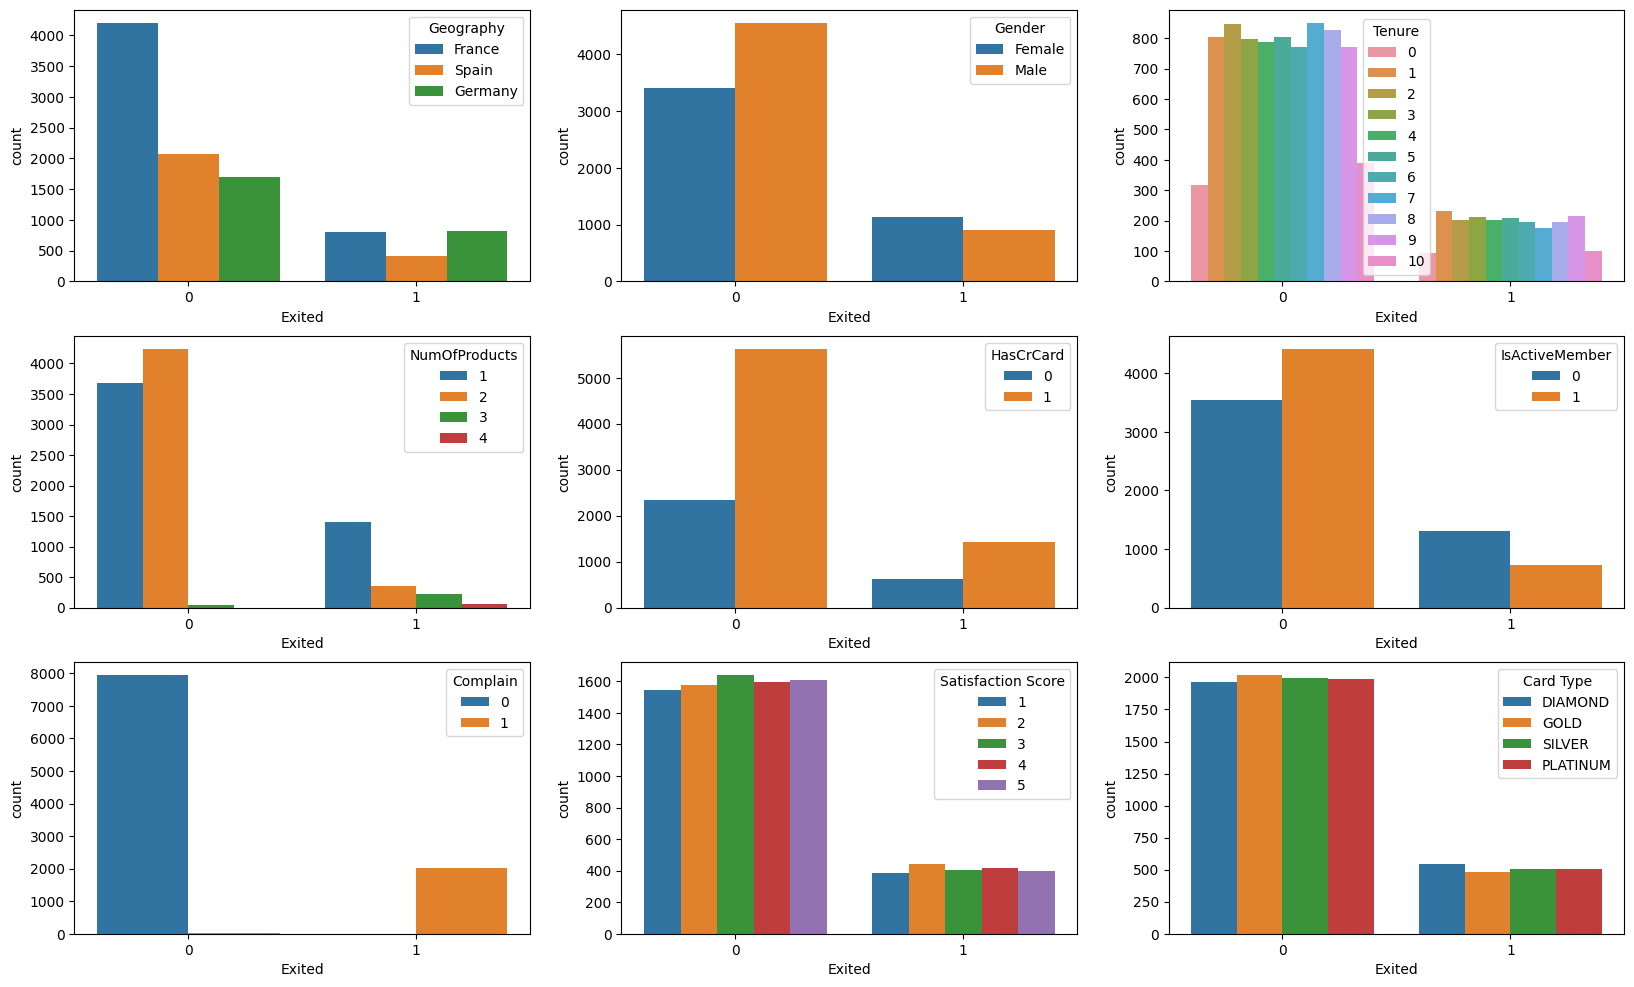

In [25]:
fig, axes = plt.subplots(3,3, figsize =(20,12))
sns.countplot(df, hue = "Geography", ax = axes[0,0], x = "Exited")
sns.countplot(df, hue = "Gender", ax = axes[0,1], x = "Exited")
sns.countplot(df, hue = "Tenure", ax = axes[0,2],  x = "Exited")
sns.countplot(df, hue = "NumOfProducts", ax = axes[1,0],  x = "Exited")
sns.countplot(df, hue = "HasCrCard", ax = axes[1,1],  x = "Exited")
sns.countplot(df, hue = "IsActiveMember", ax = axes[1,2],  x = "Exited")
sns.countplot(df, hue = "Complain", ax = axes[2,0],  x = "Exited")
sns.countplot(df, hue = "Satisfaction Score", ax = axes[2,1],  x = "Exited")
sns.countplot(df, hue = "Card Type", ax = axes[2,2],  x = "Exited")

### Realize that:
+ Germany have people exit in high probality -> Need find why

+ Female tends exit more than Male -> Need to add more gift for Female

+ People who have 1 product tend to exit -> encourage people to have more 1 product 

+ People who have creditCard/ isActiveMember tends to stay -> encourage people to have credit card/ActiveMember

+ People who have complain about the bank tends to exit -> The bank has a bad customer service -> Improve


### Relation Exit and numerical variable

<Axes: xlabel='Exited', ylabel='Point Earned'>

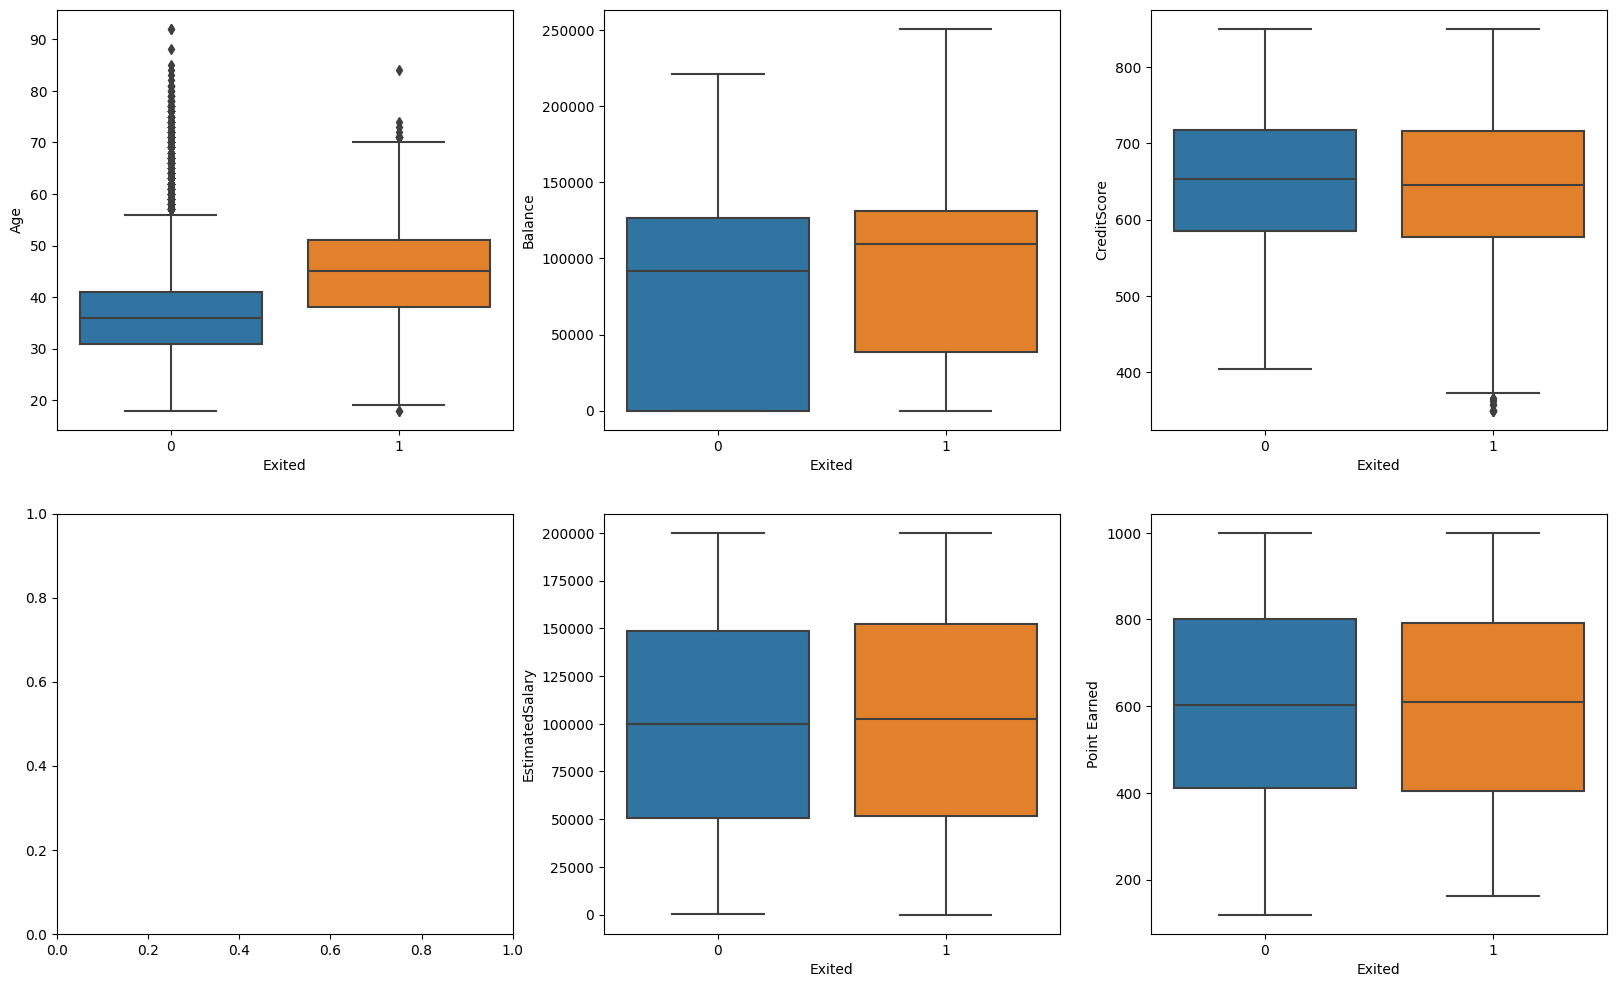

In [26]:
fig, axes = plt.subplots(2,3, figsize = (20,12))

sns.boxplot(df, x = 'Exited' ,y = 'Age', ax = axes[0][0])
sns.boxplot(df, x = 'Exited', y = 'Balance', ax = axes[0][1])
sns.boxplot(df, x = 'Exited' ,y = 'CreditScore', ax = axes[0][2])
sns.boxplot(df, x = 'Exited' ,y = 'EstimatedSalary', ax = axes[1][1])
sns.boxplot(df, x = 'Exited' ,y = 'Point Earned', ax = axes[1][2])

### Realize that

+ Age: The old people tends to exit -> Add gift for the old people

+ Balance : The rich people tends to exit

<Axes: xlabel='Geography', ylabel='Balance'>

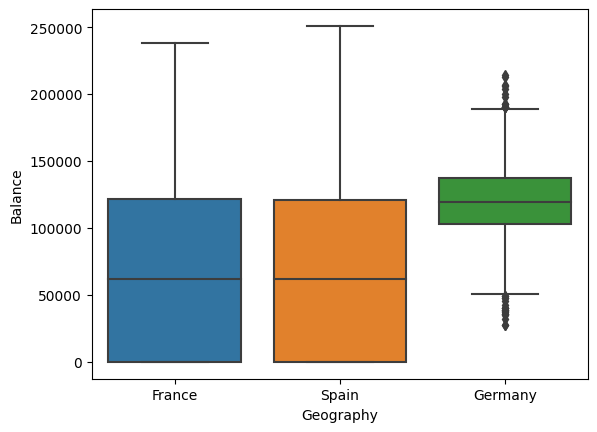

In [27]:
sns.boxplot(df, x = "Geography" , y = "Balance")

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

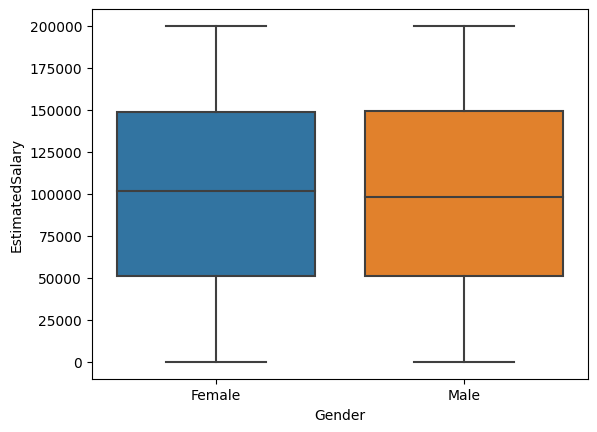

In [28]:
sns.boxplot(df, x = "Gender" , y = "EstimatedSalary")

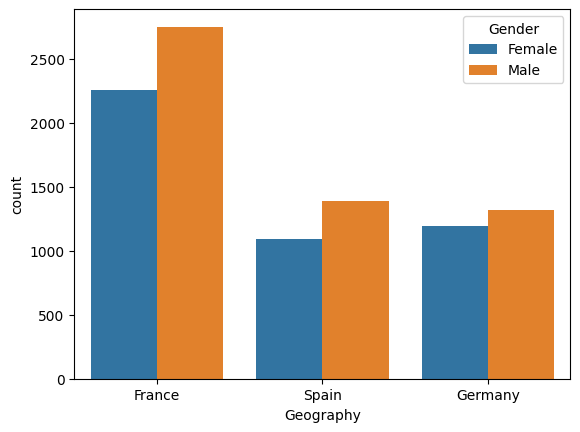

In [29]:
ax = sns.countplot(data = df , x = "Geography" , hue = "Gender")
plt.show()

### High-balance tends to churn

<Axes: xlabel='Exited', ylabel='Balance'>

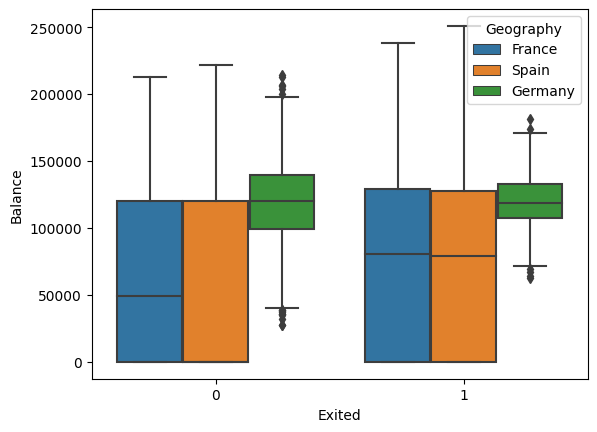

In [30]:
sns.boxplot(df, x = "Exited", y = "Balance", hue = "Geography")

High-balance tends to churn happen in Spain and France. Germany tends to churn because other problem

C:\Users\Asus ROG Strix GL503\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


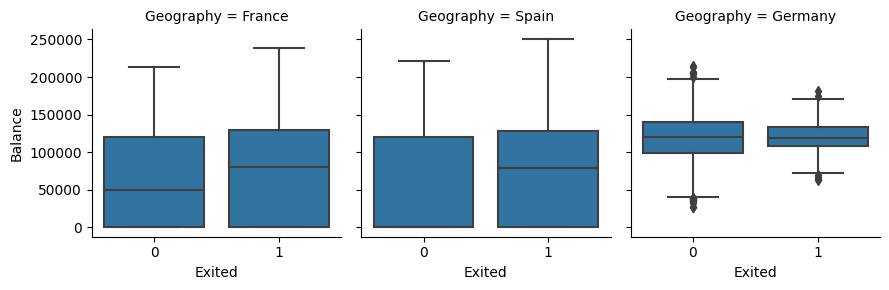

In [31]:
g = sns.FacetGrid(df, col = 'Geography')
g.map(sns.boxplot, "Exited", "Balance")

## Summary 

#### Some features which affect to people who tends to churn. Can use these features to Modeling because they affect to decision of people

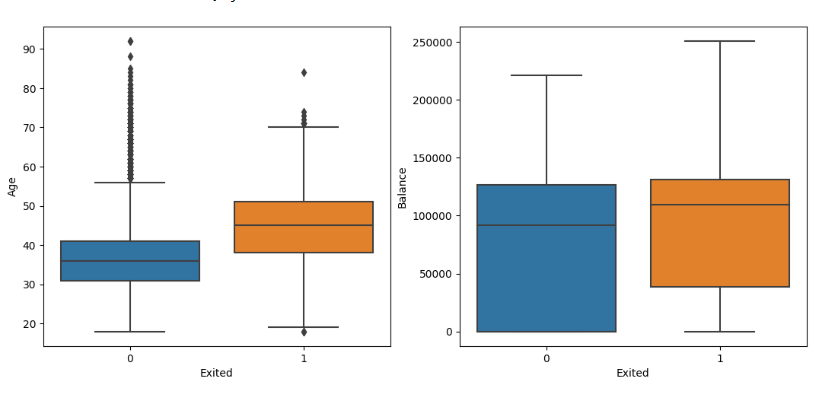
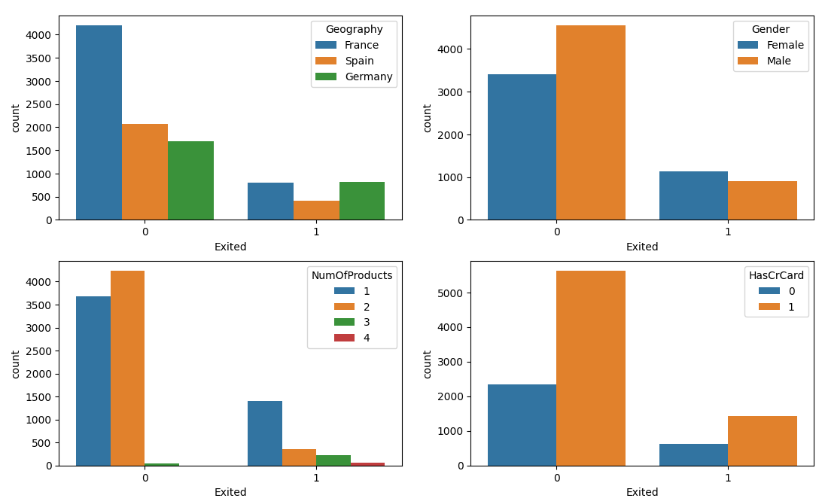
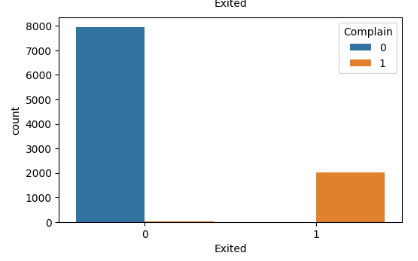


Solution :

* Focus on market in Germany and Female Customer

* Find the way to hold the people who have high balance in France and Spain and the old people

* Improve the customer service, encourage people to active member, get credit card and have more product